### Import implementation classes

In [2]:
from SchedulingProblem import ProjectSchedulingModel
from ArtificialBeeColony import ArtificialBeeColony, Parameters

### Load problems instances

In [3]:
PATH = "j30.sm/j30"
problems = [ProjectSchedulingModel.from_file(f"{PATH}{i}_{j}.sm") for i in range(1, 49) for j in range(1, 11)]

In [4]:
with open("j30opt.sm", "r") as f:
    lines = f.readlines()

optimal = []
for line in lines[22:502]:
    line = line.split()
    optimal.append(int(line[2]))

In [5]:
def normalize(data):
    min_val = min(data)
    max_val = max(data)
    return [(x - min_val) / (max_val - min_val) for x in data]

### Instantiate ABC optimizer

In [6]:
n = 120
abc = ArtificialBeeColony(psmodel=problems[n])
params = Parameters(N=200, limit=35, max_trials=20, mr=0.2)

### Solve

In [7]:
history = abc.optimize(params=params)
population_diversity = abc.population_divsersity
nscout_bees = abc.nscout_bees
best_solution = history[-1]

### Show results

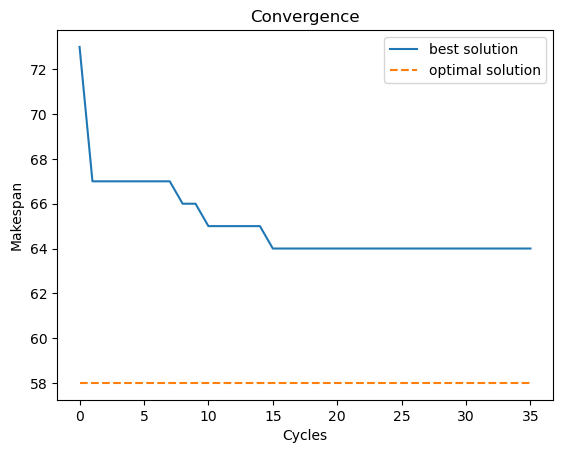

In [8]:
import matplotlib.pyplot as plt

plt.plot([s.get_makespan() for s in history], label='best solution')
plt.plot([optimal[n]] * len(history), linestyle='--', label='optimal solution')

plt.xlabel('Cycles')
plt.ylabel('Makespan')
plt.title('Convergence')
plt.legend()

plt.show()

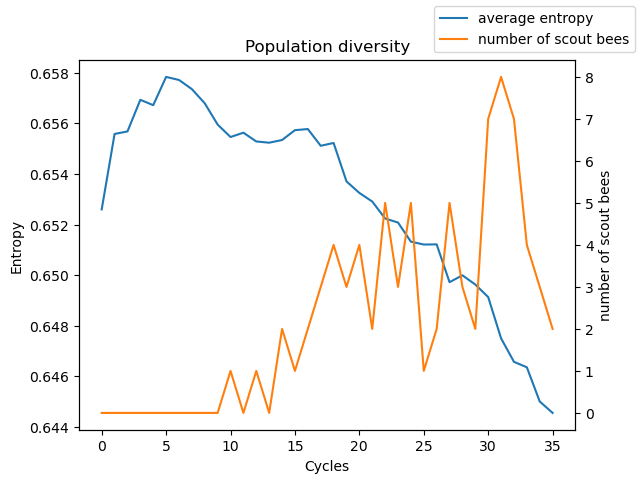

In [9]:
# Sample data
x = [i for i in range(len(population_diversity))]
y1 = population_diversity      # First dataset
y2 = nscout_bees
# Create a figure and axis
fig, ax1 = plt.subplots()

color1 = '#1f77b4'  # blue from Tableau palette
color2 = '#ff7f0e'  # orange from Tableau palette

# Plot the first dataset
ax1.plot(x, y1, label='average entropy', color=color1)
ax1.set_xlabel('Cycles')
ax1.set_ylabel('Entropy')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(x, y2, color=color2, label='number of scout bees')
ax2.set_ylabel('number of scout bees')
ax2.tick_params(axis='y')

fig.legend()
# Show the plot
plt.title("Population diversity")
plt.show()


In [10]:
print(best_solution)

Event 0 at time 0, jobs: 1, 3
Event 1 at time 2, jobs: 6, 4
Event 2 at time 3, jobs: 2
Event 3 at time 6, jobs: 11, 5, 7
Event 4 at time 7, jobs: 12
Event 5 at time 11, jobs: 10
Event 6 at time 13, jobs: 13, 21
Event 7 at time 14, jobs: 15
Event 8 at time 19, jobs: 18
Event 9 at time 23, jobs: 8
Event 10 at time 24, jobs: 17
Event 11 at time 25, jobs: 14
Event 12 at time 29, jobs: 24
Event 13 at time 32, jobs: 23
Event 14 at time 33, jobs: 16
Event 15 at time 37, jobs: 19
Event 16 at time 40, jobs: 27, 9
Event 17 at time 46, jobs: 25
Event 18 at time 48, jobs: 20
Event 19 at time 49, jobs: 22, 28
Event 20 at time 52, jobs: 31
Event 21 at time 55, jobs: 29, 26
Event 22 at time 56, jobs: 30
Event 23 at time 64, jobs: 32



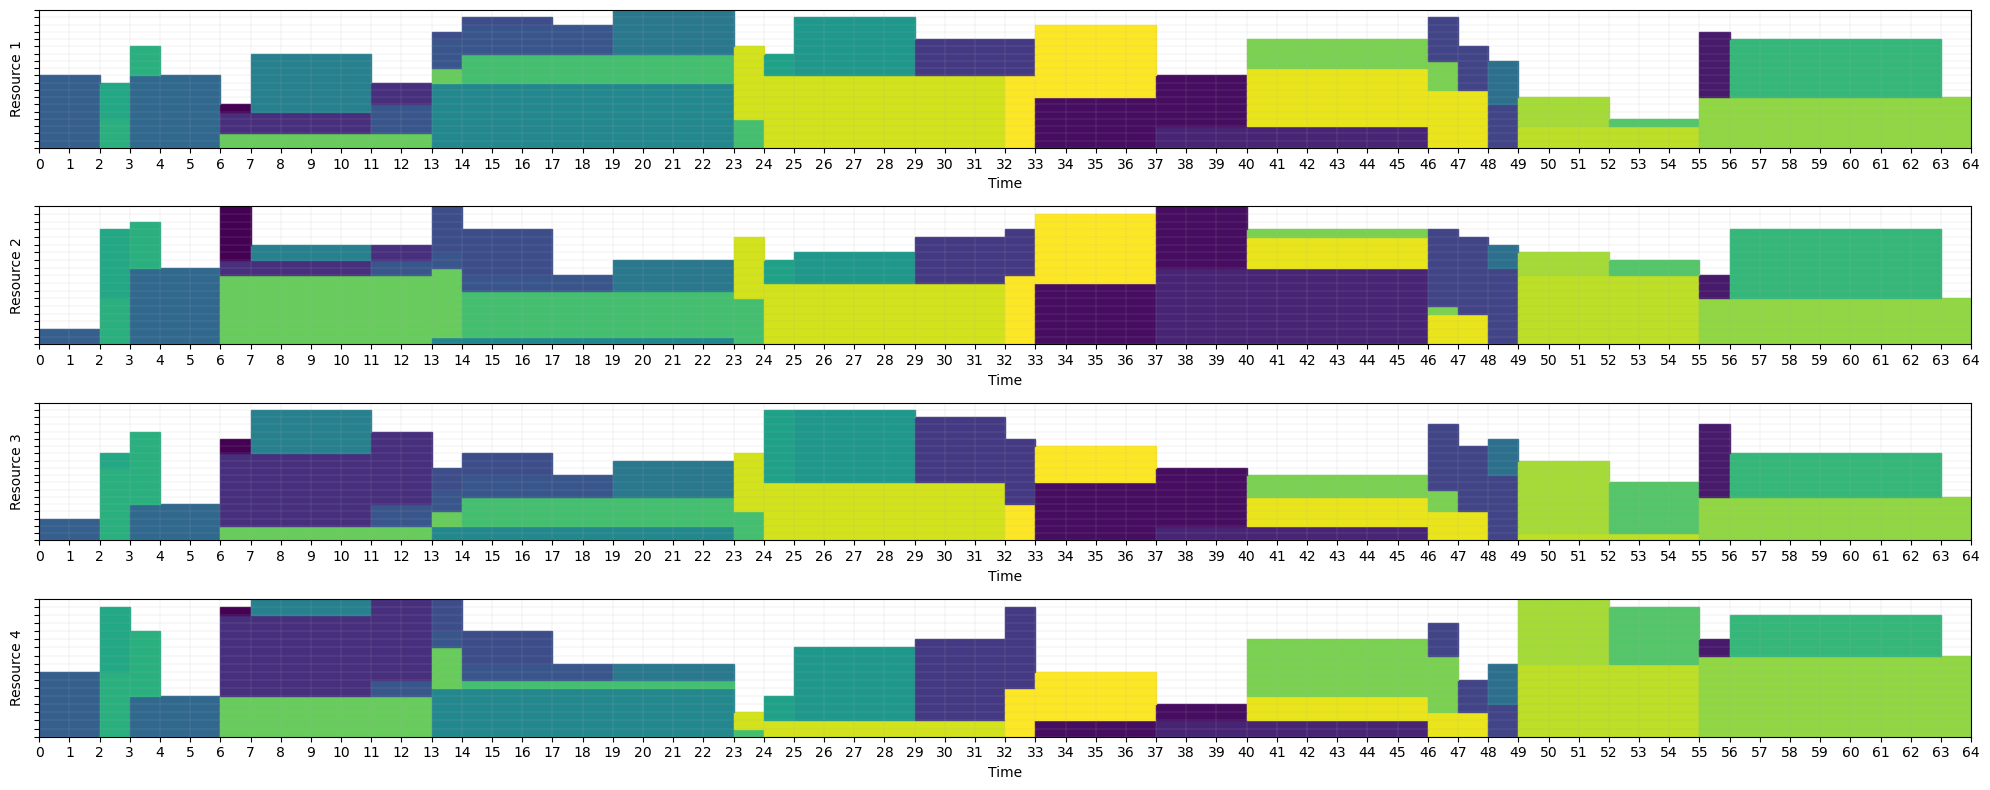

In [11]:
best_solution.plot()

In [12]:
print(problems[n].validate_solution(best_solution))

True


63


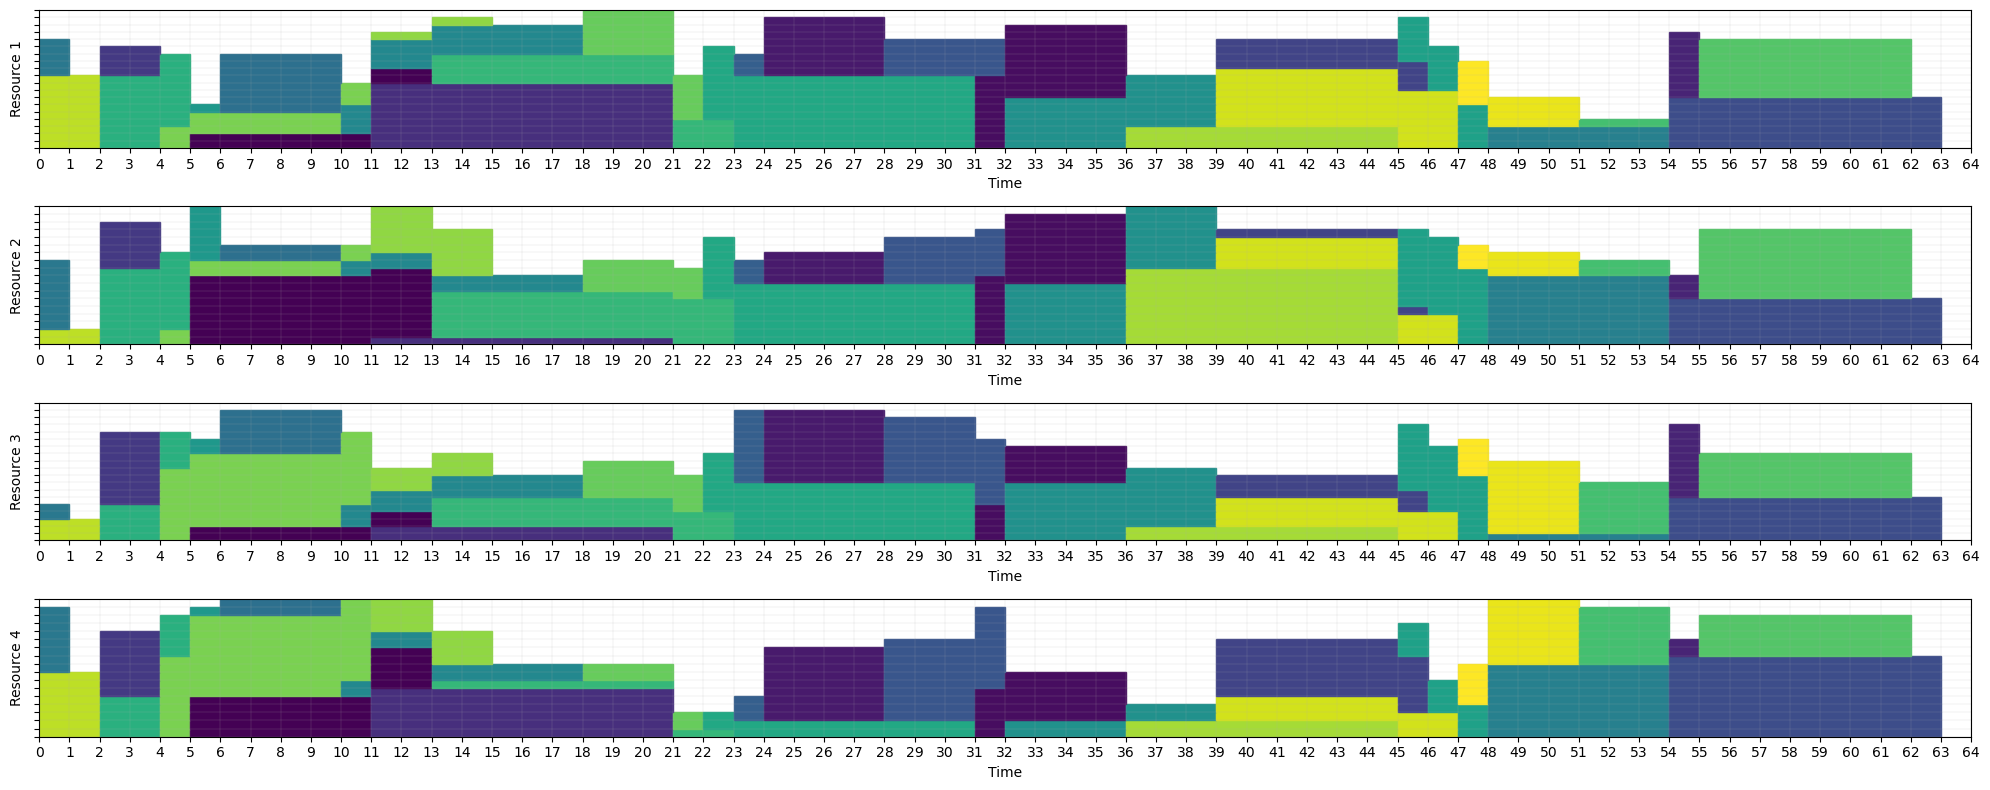

In [17]:
best_solution.shift_foward_search()
print(best_solution.get_makespan())
best_solution.plot()

In [14]:
print(best_solution)

Event 0 at time 0, jobs: 1, 3
Event 1 at time 2, jobs: 6, 4
Event 2 at time 3, jobs: 2
Event 3 at time 6, jobs: 11, 5, 7
Event 4 at time 7, jobs: 12
Event 5 at time 11, jobs: 10
Event 6 at time 13, jobs: 13, 21
Event 7 at time 14, jobs: 15
Event 8 at time 19, jobs: 18
Event 9 at time 23, jobs: 8
Event 10 at time 24, jobs: 17
Event 11 at time 25, jobs: 14
Event 12 at time 29, jobs: 24
Event 13 at time 32, jobs: 23
Event 14 at time 33, jobs: 16
Event 15 at time 37, jobs: 19
Event 16 at time 40, jobs: 27, 9
Event 17 at time 46, jobs: 25
Event 18 at time 48, jobs: 20
Event 19 at time 49, jobs: 22, 28
Event 20 at time 52, jobs: 31
Event 21 at time 55, jobs: 29, 26
Event 22 at time 56, jobs: 30
Event 23 at time 64, jobs: 32



In [18]:
problems[n].validate_solution(best_solution)

True